# Interpreting CNN predictions 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

PATH = os.path.abspath('..')

%matplotlib inline

In [4]:
preds = pd.read_csv(f'{PATH}/results/predictions/best_xGASS-34.csv', index_col=0)
preds.sample(3)

,fgas_pred,fgas_true
GASS,,
28551,-1.755909,-1.780
30192,-1.606783,-1.775
20041,-1.267461,-0.905


In [5]:
data = pd.read_csv(f'{PATH}/data/xGASS_representative_sample.csv', index_col=0)
data.sample(3)

,AGCnr,SDSS,PLATEID,MJD,FIBERID,RA,DEC,zSDSS,Dlum,lgMstar,...,lgGF,HIconf_flag,weight,group_id_B,NYU_id,env_code_B,Ngal_B,yang_shred_code,logMh_Mst_B,lvir_ratB
GASS,,,,,,,,,,,,,,,,,,,,,
27204,100564,J004735.13+140918.4,419,51868,57,11.89638,14.15513,0.03865,170.4,10.263,...,-0.213,0.0,0.681,62651,148603,1,1,0,11.8587,-4.104202
10150,252953,J150026.75+041044.4,589,52055,428,225.11148,4.17902,0.03279,144.0,10.531,...,-1.810,-99.0,0.634,129228,491490,1,1,0,11.9790,-3.680381
42020,252814,J151516.46+063918.5,1817,53851,150,228.81860,6.65515,0.03516,154.6,10.514,...,-1.819,-99.0,0.634,23,1368460,0,125,0,14.4598,-0.177287


In [6]:
# get Δfgas
preds['d_fgas'] = preds.fgas_pred - preds.fgas_true

In [9]:
# combine dataframes
df = preds.join(data, on='GASS', how='left')
df.sample(5)

,fgas_pred,fgas_true,d_fgas,AGCnr,SDSS,PLATEID,MJD,FIBERID,RA,DEC,...,lgGF,HIconf_flag,weight,group_id_B,NYU_id,env_code_B,Ngal_B,yang_shred_code,logMh_Mst_B,lvir_ratB
GASS,,,,,,,,,,,,,,,,,,,,,
112002,-1.179439,-1.054005,-0.125434,0,J125756.51+272256.2,2240,53823,105,194.48549,27.38230,...,-1.054,-99.0,2.294,411593,2226159,1,1,0,0.0000,-99.000000
114044,-1.096489,-0.829551,-0.266938,240062,J140452.67+213800.6,2771,54527,414,211.21948,21.63351,...,-0.830,0.0,0.655,437308,2318405,1,1,0,0.0000,-99.000000
23441,-1.441944,-0.910000,-0.531944,202671,J105316.22+113820.0,1602,53117,440,163.31760,11.63890,...,-0.910,0.0,0.634,226192,1074980,1,1,0,11.9353,-4.228331
39605,-1.369617,-1.580000,0.210383,714957,J152559.84+094724.5,1722,53852,302,231.49934,9.79016,...,-1.580,-99.0,0.564,271186,1268351,1,1,0,0.0000,-99.000000
3851,-1.730950,-1.452000,-0.278950,110459,J013851.94+150258.8,426,51882,453,24.71644,15.04969,...,-1.452,1.0,0.634,2966,153806,0,7,0,12.7530,-0.966298


See http://xgass.icrar.org/assets/data/xGASS_representative_sample.readme for details

In [10]:
df.columns

Index(['fgas_pred', 'fgas_true', 'd_fgas', 'AGCnr', 'SDSS', 'PLATEID', 'MJD',
       'FIBERID', 'RA', 'DEC', 'zSDSS', 'Dlum', 'lgMstar', 'expAB_r',
       'model_r', 'merr_r', 'ext_r', 'petrR50_r', 'petrR90_r', 'petrR50_z',
       'lgmust', 'CINDX', 'INCL', 'NUVr', 'lgSFR_tot_median', 'SFR_best',
       'SFRerr_best', 'SFRcase_best', 'HIsrc', 'HI_FLAG', 'xGASSDR', 'zHI',
       'W50cor', 'lgMHI', 'lgGF', 'HIconf_flag', 'weight', 'group_id_B',
       'NYU_id', 'env_code_B', 'Ngal_B', 'yang_shred_code', 'logMh_Mst_B',
       'lvir_ratB'],
      dtype='object')

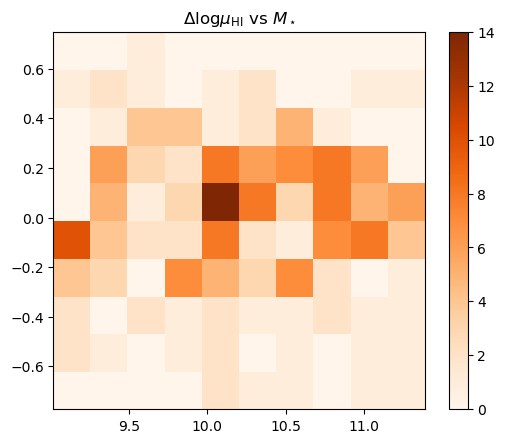

In [53]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log\mu_{\rm HI}$ vs $M_\star$')
plt.hist2d(df.lgMstar, df.d_fgas, cmap='Oranges', bins=10);
plt.colorbar()

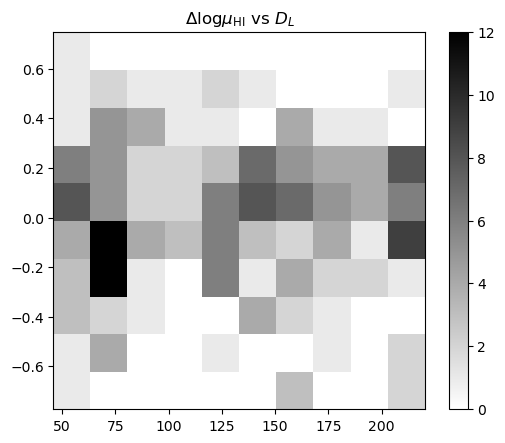

In [52]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta\log \mu_{\rm HI}$ vs $D_L$')
plt.hist2d(df.Dlum, df.d_fgas, cmap='binary', bins=10);
plt.colorbar()

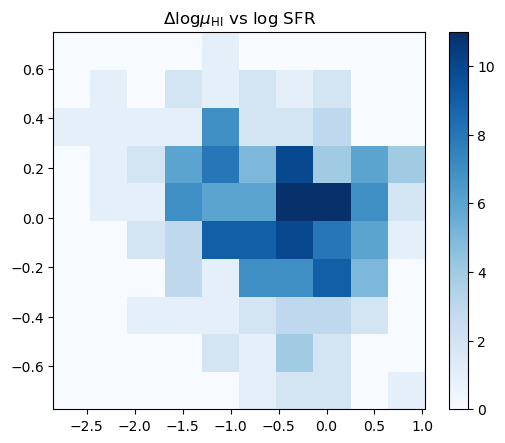

In [51]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs log SFR')
plt.hist2d(np.log10(df[df.SFR_best > 0].SFR_best), df[df.SFR_best > 0].d_fgas, cmap='Blues', bins=10);
plt.colorbar()

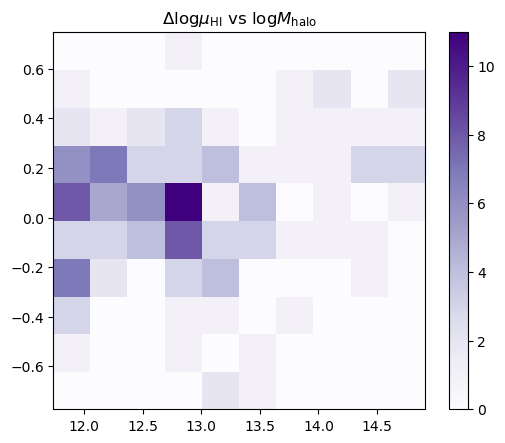

In [50]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs $\log M_{\rm halo}$')
plt.hist2d(df[df.logMh_Mst_B > 0].logMh_Mst_B, df[df.logMh_Mst_B > 0].d_fgas, cmap='Purples', bins=10);
plt.colorbar()

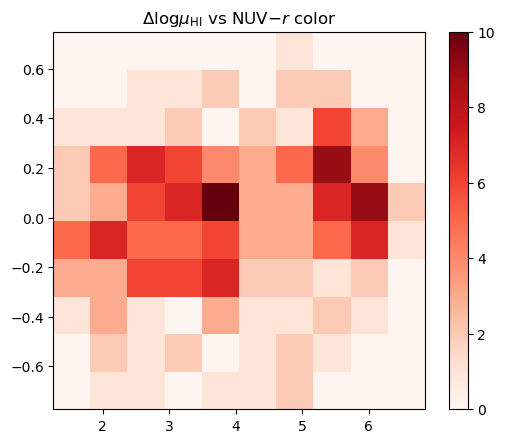

In [49]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs NUV$-r$ color')
plt.hist2d(df[df.NUVr > -10].NUVr, df[df.NUVr > -10].d_fgas, cmap='Reds', bins=10);
plt.colorbar()

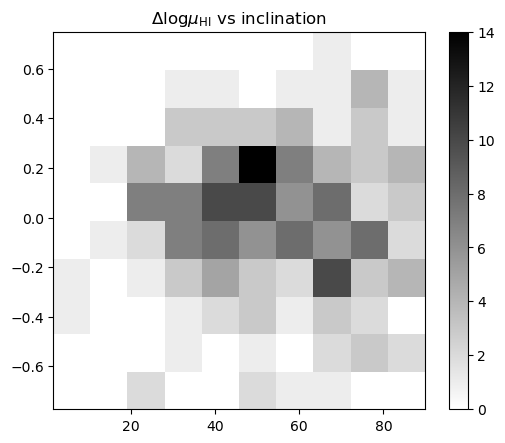

In [48]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs inclination')
plt.hist2d(df.INCL, df.d_fgas, cmap='binary', bins=10);
plt.colorbar()

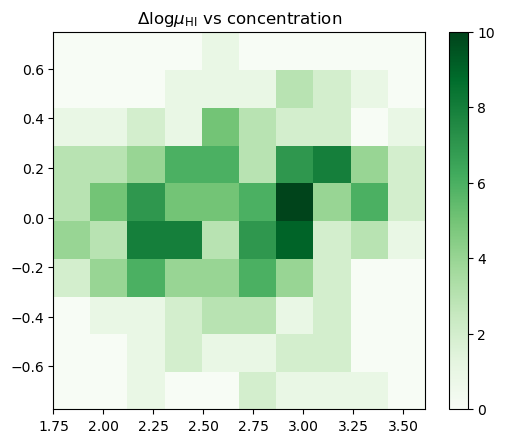

In [47]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs concentration')
plt.hist2d(df.CINDX, df.d_fgas, cmap='Greens', bins=10);
plt.colorbar()

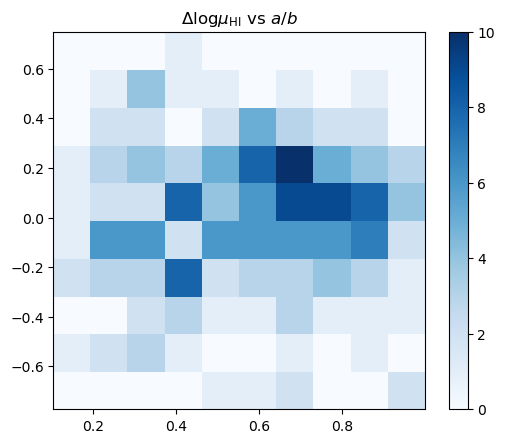

In [58]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs $a/b$')
plt.hist2d(df.expAB_r, df.d_fgas, cmap='Blues', bins=10);
plt.colorbar()


In [70]:
g.groups[0]


Int64Index([  5442,  17840,  24437,  11297, 110054,  23518,  28703,  41969,
             10943,  38591, 108119,   3851, 108125, 114036, 101001,  50856,
             10948,  11268,  11669, 114067,  29225,  42140,  42020,  10942,
             11514, 112011,  55711,  42156, 112012, 111080,  23195,  10952,
            108116, 112106, 113040, 111063,  11086,  25236, 101019,   9776,
            108093,  12967, 112084,  42025,  23026,  25057,  12062,   4017,
            101022,  20445, 113078,  13074,  26629, 111079, 101033, 108114,
              9748,   4130, 108097, 110007,   3981,  38717, 109090, 114065,
             56632],
           dtype='int64', name='GASS')

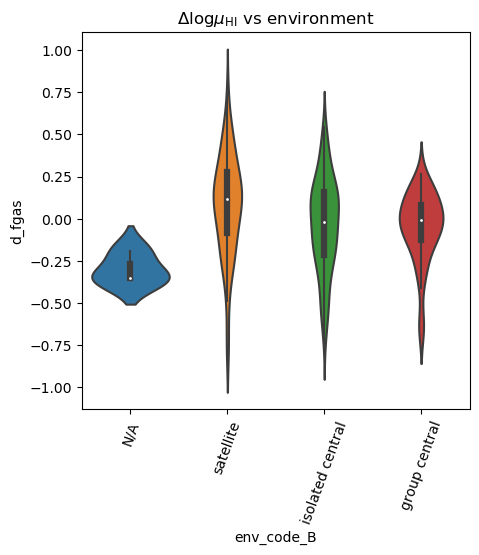

In [86]:
plt.figure(figsize=(5, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs environment')

sns.violinplot(x='env_code_B', y='d_fgas', data=df)
plt.xticks(range(4), ['N/A', 'satellite', 'isolated central', 'group central'], rotation=70);